<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
# Import the yfinance library
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Display basic info about Tesla to verify
print(tesla.info)
# Fetch historical stock prices for Tesla
historical_data = tesla.history(period="max")

# Display the first few rows of the historical data
print(historical_data.head())

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [14]:
# Import the yfinance library
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla and save it to a DataFrame
tesla_data = tesla.history(period="max")

# Display the first few rows of the DataFrame to verify
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [15]:
# Import the yfinance library
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla and save it to a DataFrame
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [10]:
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Display the first 500 characters of the html_data to verify
print(html_data[:500])  # Displaying only the first 500 characters for brevity



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Download the webpage
response = requests.get(url, headers=headers)

# Ensure the request was successful
if response.status_code == 200:
    html_data = response.content
else:
    raise Exception(f"Failed to retrieve the webpage. Status code: {response.status_code}")

# Parse the HTML content using html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Step 1: Find all tables
tables = soup.find_all('table')

# Step 2: Identify the relevant table
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        relevant_table = table
        break

if not relevant_table:
    raise Exception("No relevant table found.")

# Step 3: Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Loop through rows
# Locate the table body or rows directly if tbody is not found
tbody = relevant_table.find('tbody')
if not tbody:
    rows = relevant_table.find_all('tr')  # If no tbody, find rows directly
else:
    rows = tbody.find_all('tr')

for row in rows:
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        
        # Step 5: Clean revenue data
        revenue = revenue.replace('$', '').replace(',', '')
        
        # Step 6: Add rows to DataFrame
        new_row = pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Display the first few rows of the DataFrame
tesla_revenue.head()


,Date,Revenue
0,2024-06-30,25500
1,2024-03-31,21301
2,2023-12-31,25167
3,2023-09-30,23350
4,2023-06-30,24927


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [19]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Download the webpage
response = requests.get(url, headers=headers)

# Ensure the request was successful
if response.status_code == 200:
    html_data = response.content
else:
    raise Exception(f"Failed to retrieve the webpage. Status code: {response.status_code}")

# Parse the HTML content using html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Find all tables
tables = soup.find_all('table')

# Identify the relevant table
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        relevant_table = table
        break

if not relevant_table:
    raise Exception("No relevant table found.")

# Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Locate the table body or rows directly if tbody is not found
tbody = relevant_table.find('tbody')
if not tbody:
    rows = relevant_table.find_all('tr')  # If no tbody, find rows directly
else:
    rows = tbody.find_all('tr')

for row in rows:
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        
        # Clean revenue data
        revenue = revenue.replace('$', '').replace(',', '')
        
        # Add rows to DataFrame
        new_row = pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Display the last 5 rows of the DataFrame
tesla_revenue.tail()


,Date,Revenue
56,2010-06-30,28
57,2010-03-31,21
58,2009-12-31,
59,2009-09-30,46
60,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [24]:
# Import the yfinance library
import yfinance as yf

# Step 1: Create a ticker object for GameStop
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)

# Step 2: Extract historical stock data
# For example, get historical data with the 'history' method
gme_data = gme_ticker.history(period='max')  # 'max' period for the maximum historical data

# Display the first few rows of the data
print(gme_data.head())

# Optionally, you can extract other types of data
# For example, get financials
financials = gme_ticker.financials
print(financials.head())

# Or get the company's info
info = gme_ticker.info
print(info)



                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
                                        2024-01-31   2023-01-31   2022-01-3

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [23]:
# Import the yfinance library
import yfinance as yf

# Step 1: Create a ticker object for GameStop
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)

# Step 2: Extract historical stock data
# Get historical data with the 'history' method
gme_data = gme_ticker.history(period='max')  # 'max' period for the maximum historical data

# Display the first few rows of the data to confirm
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [25]:
import yfinance as yf

# Create a ticker object for GameStop
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)

# Extract historical stock data
gme_data = gme_ticker.history(period='max')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [26]:
import requests

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send HTTP GET request to download the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the text of the response as a variable
    html_data_2 = response.text
    print("Webpage downloaded successfully!")
else:
    raise Exception(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Webpage downloaded successfully!


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [27]:
from bs4 import BeautifulSoup

# Assuming html_data_2 contains the HTML content
# Parse the HTML data using 'html.parser'
soup_html_parser = BeautifulSoup(html_data_2, 'html.parser')

# Print out the parsed HTML to verify
print(soup_html_parser.prettify()[:1000])  # Print first 1000 characters for preview


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [28]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming html_data_2 contains the HTML content
soup = BeautifulSoup(html_data_2, 'html.parser')  # or 'html5lib'

# Step 1: Find all tables
tables = soup.find_all('table')

# Step 2: Identify the relevant table
relevant_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.get_text():  # Adjust based on actual table header
        relevant_table = table
        break

if relevant_table is None:
    raise Exception("No relevant table found.")

# Step 3: Extract rows from the table
rows = relevant_table.find_all('tr')

# Step 4: Initialize DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Loop through rows and extract data
for row in rows:
    cols = row.find_all('td')
    if len(cols) == 2:  # Ensure the row has exactly two columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        # Clean revenue data: remove dollar signs and commas
        revenue = revenue.replace('$', '').replace(',', '')
        
        # Append to DataFrame
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])], ignore_index=True)

# Display the first few rows to verify
print(gme_revenue.head())


         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
# Display the last five rows of the DataFrame
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


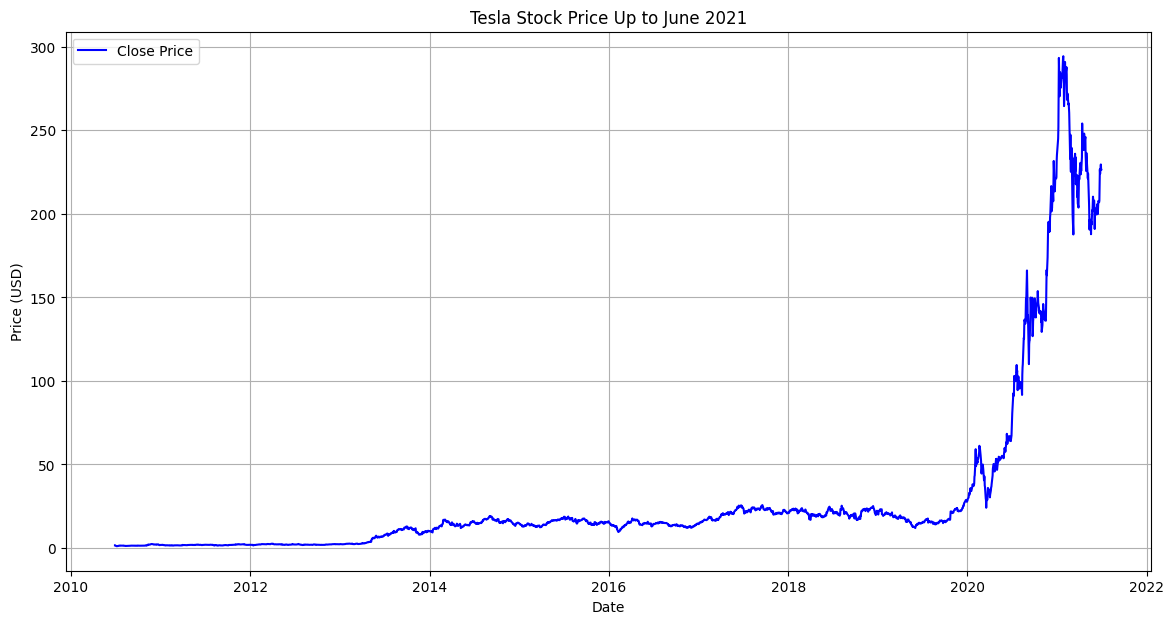

In [30]:
import matplotlib.pyplot as plt

# Define the make_graph function if not already defined
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    
    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    
    # Optional: Plot revenue data if needed; make sure to adjust this if revenue_data is not relevant here
    if revenue_data is not None:
        plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange', linestyle='--')
    
    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

# Assuming tesla_data contains the historical stock data and tesla_revenue contains the revenue data
# Filter tesla_data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, None, 'Tesla Stock Price Up to June 2021')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


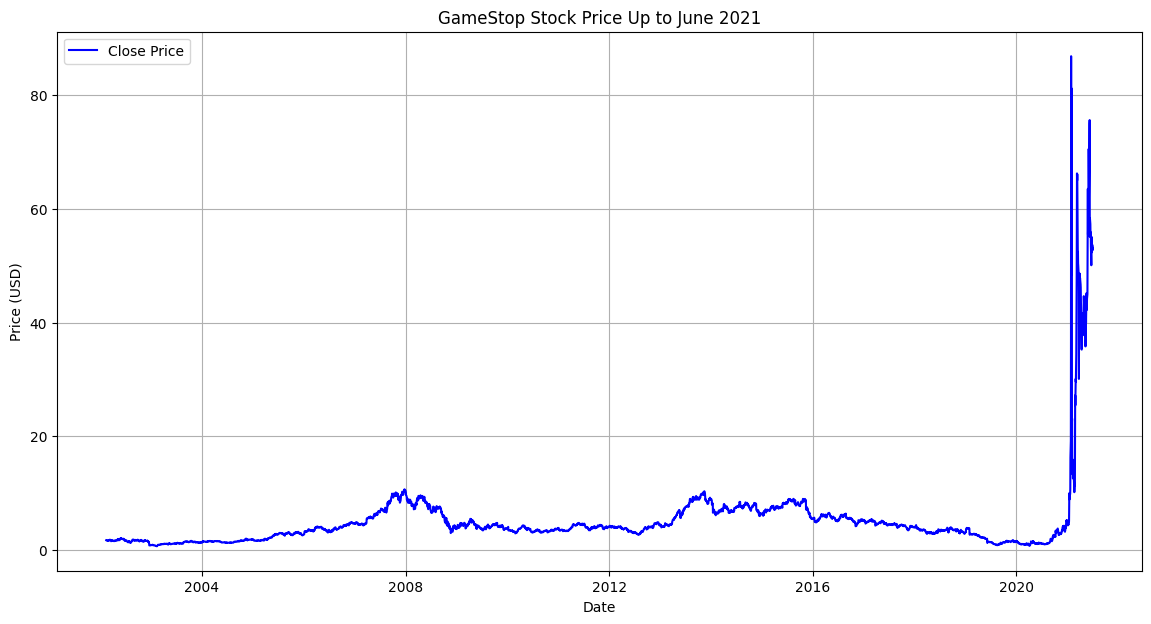

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    
    # Plot the stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    
    # Optional: Plot revenue data if provided
    if revenue_data is not None:
        plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange', linestyle='--')
    
    # Format the plot
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

# Create a ticker object for GameStop
gme_ticker = yf.Ticker('GME')

# Extract historical stock data
gme_data = gme_ticker.history(period='max')

# Reset the index to use 'Date' as a column for filtering
gme_data.reset_index(inplace=True)

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# For the purposes of this example, we'll assume gme_revenue is not used. Set it to None.
gme_revenue = None

# Call the make_graph function with the filtered GameStop data
make_graph(gme_data_filtered, gme_revenue, 'GameStop Stock Price Up to June 2021')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
